Neste notebook faremos uma análise exploratória dos dados pré-processados da Wyscout, em seguida treinaremos dois modelos de classificação - Regressão Logística e Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mplsoccer import VerticalPitch
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#other
import aux_functions_plot as p

#ml / stats

import sklearn.metrics as sk_metrics
from sklearn.model_selection import  KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



## Leitura dos dados


In [2]:
shots = pd.read_parquet('./data/shots_dataframe.parquet')

In [3]:
goals = shots[shots["goal"] == 1].copy()

In [4]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,league,foot,firstName,lastName,label,venue,date,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
257339,10,Shot,"[{'id': 402}, {'id': 1401}, {'id': 1203}, {'id...",25437,"[{'x': 91, 'y': 29}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,31.226217,100,88178649,European_Championship,left,Blaise,Matuidi,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Head pass,9.45,19.72,14.28,17.123694,0.242346,0,0,0,0,0,0,1,0,0
257923,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",83824,"[{'x': 71, 'y': 29}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,143.119551,100,88178722,European_Championship,right,Mihai Doru,Pintilii,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Simple pass,30.45,19.72,14.28,33.632141,0.196835,0,0,0,0,0,0,1,0,0
258172,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",33235,"[{'x': 96, 'y': 57}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,219.576026,100,88178751,European_Championship,right,Bogdan Sorin,Stancu,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Air duel,4.20,38.76,4.76,6.348039,0.851948,0,0,0,0,0,0,0,0,1
257684,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1215}, {'id'...",6165,"[{'x': 96, 'y': 61}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,247.532561,100,88373458,European_Championship,right,Florin,Andone,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Air duel,4.20,41.48,7.48,8.578485,0.472204,0,0,0,0,0,0,0,0,1
257303,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",3682,"[{'x': 75, 'y': 33}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,557.319065,100,88178811,European_Championship,left,Antoine,Griezmann,"France - Romania, 2 - 1",Stade de France,"June 10, 2016 at 9:00:00 PM GMT+2",Simple pass,26.25,22.44,11.56,28.682679,0.233111,0,0,0,0,0,0,1,0,0


### Checando data types / NaNs

In [5]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45284 entries, 257339 to 2988607
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventId          45284 non-null  int64  
 1   subEventName     45284 non-null  object 
 2   tags             45284 non-null  object 
 3   playerId         45284 non-null  int64  
 4   positions        45284 non-null  object 
 5   matchId          45284 non-null  int64  
 6   eventName        45284 non-null  object 
 7   teamId           45284 non-null  int64  
 8   matchPeriod      45284 non-null  object 
 9   eventSec         45284 non-null  float64
 10  subEventId       45284 non-null  int64  
 11  id               45284 non-null  int64  
 12  league           45284 non-null  object 
 13  foot             45284 non-null  object 
 14  firstName        45284 non-null  object 
 15  lastName         45284 non-null  object 
 16  label            45284 non-null  object 
 17  venue

In [6]:
shots.isna().mean()

eventId            0.0
subEventName       0.0
tags               0.0
playerId           0.0
positions          0.0
matchId            0.0
eventName          0.0
teamId             0.0
matchPeriod        0.0
eventSec           0.0
subEventId         0.0
id                 0.0
league             0.0
foot               0.0
firstName          0.0
lastName           0.0
label              0.0
venue              0.0
date               0.0
previous_event     0.0
x                  0.0
y                  0.0
c                  0.0
distance           0.0
angle              0.0
goal               0.0
free_kick          0.0
counter_attack     0.0
rebound            0.0
prev_cross         0.0
prev_touch         0.0
prev_pass          0.0
prev_smart_pass    0.0
prev_duel          0.0
dtype: float64

In [7]:
shots.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'league', 'foot', 'firstName', 'lastName', 'label', 'venue', 'date',
       'previous_event', 'x', 'y', 'c', 'distance', 'angle', 'goal',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'],
      dtype='object')

### Checando o tipo de dados das features

In [8]:
shots.select_dtypes("int").columns


Index(['eventId', 'playerId', 'matchId', 'teamId', 'subEventId', 'id', 'goal',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'],
      dtype='object')

In [9]:
shots.select_dtypes("float").columns

Index(['eventSec', 'x', 'y', 'c', 'distance', 'angle'], dtype='object')

In [10]:
shots.select_dtypes("object").columns

Index(['subEventName', 'tags', 'positions', 'eventName', 'matchPeriod',
       'league', 'foot', 'firstName', 'lastName', 'label', 'venue', 'date',
       'previous_event'],
      dtype='object')

Todas as colunas do dataframe estão com o data type correto. Além disso, verificamos que não temos ocorrência de NaNs em nenhuma das features

In [11]:
print(f"O dataset contém {shots.shape[1]} features (colunas) e {shots.shape[0]} linhas")

O dataset contém 34 features (colunas) e 45284 linhas


## Análise Univaridada

Das variáveis do tipo 'int' iremos olhar apenas os gols (target). As demais variáveis são ou binárias ou de id.

### Avaliando o target (goals)

In [12]:
shots.groupby('goal').size().sort_values()

goal
1     4629
0    40655
dtype: int64

Text(0.5, 1.0, 'Distribuição do número de gols marcados')

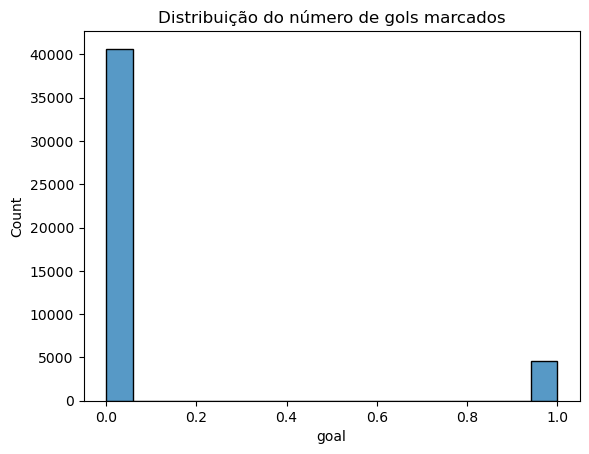

In [13]:
sns.histplot(shots['goal'])
plt.title("Distribuição do número de gols marcados")

### Avaliando as features do tipo object mais relevantes

In [14]:
shots.groupby('subEventName').size().sort_values()

subEventName
Free kick shot     2209
Shot              43075
dtype: int64

In [15]:
shots.groupby('eventName').size().sort_values()

eventName
Free Kick     2209
Shot         43075
dtype: int64

Estas 2 variáveis estão redundantes, e podemos excluir ambas, dado que já temos encoding para free_kick. Além disso, vamos excluir também position pois já extraimos as coordenadas x e y na etapa anterior.

In [16]:
excluir = ['eventName', 'subEventName', 'position', 'match_period']

In [17]:
shots.groupby('previous_event').size().sort_values(ascending = False)

previous_event
Simple pass                10615
Air duel                    5263
Ground attacking duel       4711
Ground defending duel       4553
Cross                       4057
Touch                       3003
Foul                        2099
Clearance                   2059
Smart pass                  1809
Ground loose ball duel      1446
Corner                       989
Head pass                    939
High pass                    915
Acceleration                 777
Reflexes                     526
Free kick cross              484
Shot                         216
Goalkeeper leaving line      162
Free Kick                    150
Save attempt                 131
Throw in                     126
Hand foul                     87
Launch                        60
Free kick shot                32
Protest                       23
Goal kick                     19
Out of game foul              12
Hand pass                      7
Late card foul                 6
Violent Foul                

### Avaliando as features do tipo float

Text(0.5, 1.0, 'Distribuição de chutes ao longo da distância horizontal do campo (x)')

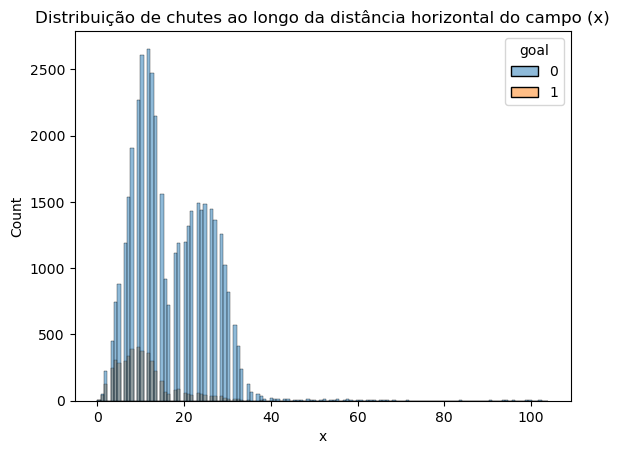

In [18]:
sns.histplot(x = shots['x'], hue = shots['goal'])
plt.title("Distribuição de chutes ao longo da distância horizontal do campo (x)")

Text(0.5, 1.0, 'Distribuição da distribuição de chutes ao longo da distância vertical do campo (y)')

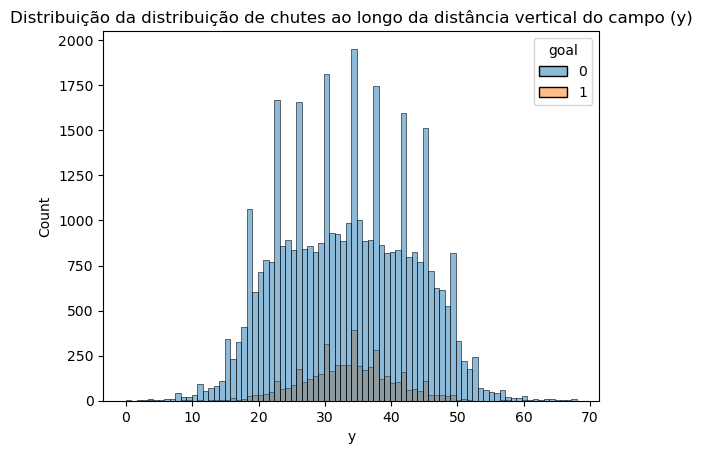

In [19]:
sns.histplot(x = shots['y'], hue = shots['goal'])
plt.title("Distribuição da distribuição de chutes ao longo da distância vertical do campo (y)")

Text(0.5, 1.0, 'Distribuição da quantidade chutes por angulo (radianos)')

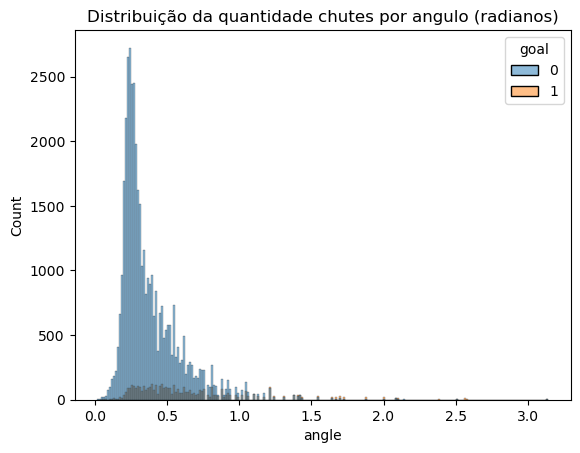

In [20]:
sns.histplot(x = shots['angle'], hue = shots['goal'])
plt.title("Distribuição da quantidade chutes por angulo (radianos)")

Text(0.5, 1.0, 'Distribuição da quantidade chutes pela distancia')

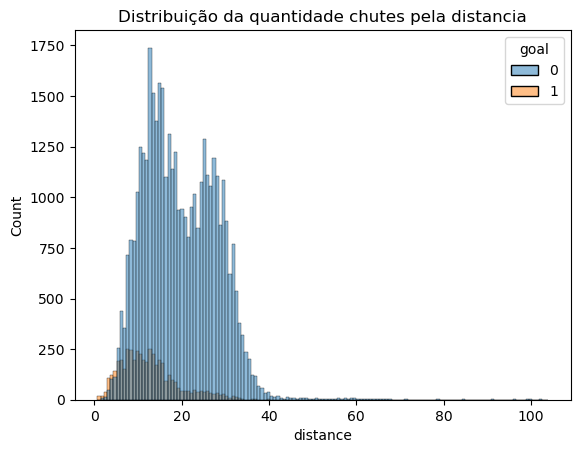

In [21]:
sns.histplot(x = shots['distance'], hue = shots['goal'])
plt.title("Distribuição da quantidade chutes pela distancia")

## Análise multivariada

### Avaliando a posição de onde os chutes partem e hipóteses iniciais

In [22]:
nb_shots, x,y, df_shots = p.prepare_heatmap(shots, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_img = df_pos.pivot(col_y + "ZoneMean", col_x + "ZoneMean", "aggVal")


In [23]:
share_shots = nb_shots / nb_shots.sum() * 100
# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes")
fig.show()

Podemos observar que a maioria dos chutes parte de dentro da área adversária, o que faz sentido. Vamos plotar agora de onde saíram os chutes que de fato resultaram em gol

In [24]:

# numero de chutes por grid
nb_goals, x, y = p.prepare_heatmap(goals, "x", "y", 24, 17)

goal_proba = np.divide(nb_goals, nb_shots, out=np.zeros_like(nb_goals), where=nb_shots!=0) * 100


# plotando o heatmap
dict_info = {"Probabilidade de marcar (em %)": {"values": goal_proba, "display_type": ".1f"},
             "Fração de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Numero de chutes": {"values": nb_shots, "display_type": ".0f"},
             "Numero de goals": {"values": nb_goals, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, goal_proba, dict_info, title_name="Probabilidade de marcar")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



É possível notar que a probabilidade marcar é maior quando se está na área adversária. Curioso notar que parece existir alguns outliers no dataset, que são gols que são marcados de muito longe, incluindo um caso que o chute partiu da área adversária e outro da lateral do campo na altura do círculo central. Vamos olhar mais de perto dentro da área no próximo plot

/var/folders/d2/5n02rp0x0x72ht561l_7rrmh0000gn/T/ipykernel_75036/1474929513.py:8: RuntimeWarning:

invalid value encountered in divide



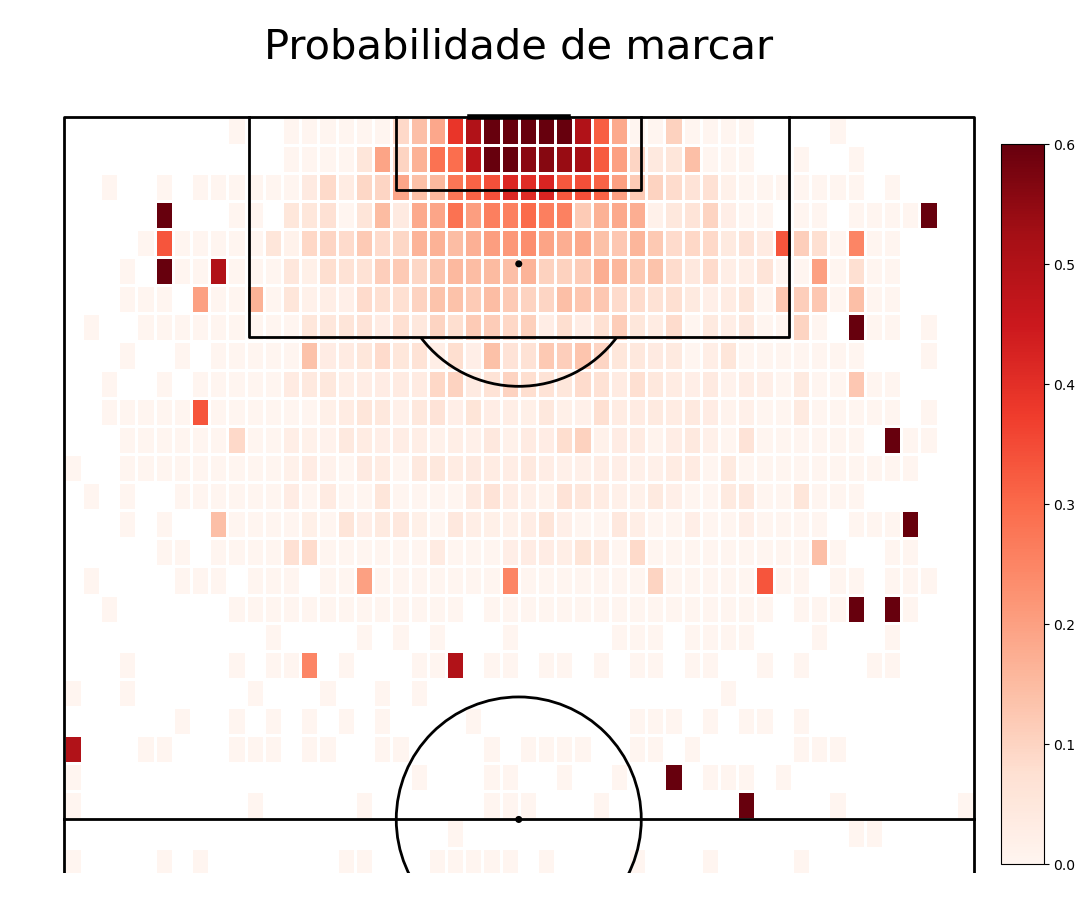

In [25]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots['x'], shots['y'], bins = 50)
#normalize number of goals by number of shots
bin_statistic_goals = pitch.bin_statistic(105 - goals['x'], goals['y'], bins=50)
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probabilidade de marcar' , fontsize = 30)
plt.show()

In [27]:
outliers = shots[((shots['x'] > 35 ) & shots['goal'] == 1) | ((shots['y'] > 55 ) & (shots['goal'] == 1)) | ((shots['y'] <5 ) & shots['goal'] == 1)] 
outliers

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,league,foot,firstName,lastName,label,venue,date,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
595383,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8717,"[{'x': 79, 'y': 85}, {'x': 100, 'y': 100}]",2499752,Shot,1624,1H,1664.160104,100,185820216,England,right,Harry,Kane,"Everton - Tottenham Hotspur, 0 - 3",Goodison Park,"September 9, 2017 at 4:00:00 PM GMT+2",Simple pass,22.05,57.80,23.80,32.444453,0.154080,1,0,0,0,0,0,1,0,0
602589,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7944,"[{'x': 44, 'y': 40}, {'x': 0, 'y': 0}]",2499856,Shot,1623,2H,1254.782389,100,210484394,England,right,Wayne,Rooney,"Everton - West Ham United, 4 - 0",Goodison Park,"November 29, 2017 at 9:00:00 PM GMT+1",Simple pass,58.80,27.20,6.80,59.191891,0.122699,1,0,0,0,0,0,1,0,0
376184,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25785,"[{'x': 93, 'y': 89}, {'x': 0, 'y': 0}]",2499888,Shot,1624,1H,2373.032449,100,214471078,England,right,Serge,Aurier,"Tottenham Hotspur - Brighton & Hove Albion, 2 - 0",Wembley Stadium,"December 13, 2017 at 9:00:00 PM GMT+1",Ground attacking duel,7.35,60.52,26.52,27.519682,0.072195,1,0,0,0,0,0,0,0,1
634602,3,Free kick shot,"[{'id': 101}, {'id': 402}, {'id': 1101}, {'id'...",54,"[{'x': 71, 'y': 6}, {'x': 100, 'y': 100}]",2500046,Free Kick,1624,2H,1043.871993,33,240759185,England,right,Christian,Dannemann Eriksen,"Stoke City - Tottenham Hotspur, 1 - 2",Bet365 Stadium,"April 7, 2018 at 4:00:00 PM GMT+2",Foul,30.45,4.08,29.92,42.689681,0.122595,1,1,0,0,0,0,0,0,0
2479068,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",28115,"[{'x': 53, 'y': 32}, {'x': 0, 'y': 0}]",2500707,Shot,3766,1H,559.297626,100,180038263,France,left,Nabil,Fekir,"Olympique Lyonnais - Bordeaux, 3 - 3",Groupama Stadium,"August 19, 2017 at 5:00:00 PM GMT+2",Touch,49.35,21.76,12.24,50.845256,0.139547,1,0,0,0,0,1,0,0,0
1276877,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",3314,"[{'x': 87, 'y': 85}, {'x': 0, 'y': 0}]",2500813,Shot,3767,1H,2464.755130,100,206726309,France,left,\u00c1ngel Fabi\u00e1n,di Mar\u00eda Hern\u00e1ndez,"PSG - Nantes, 4 - 1",Parc des Princes,"November 18, 2017 at 5:00:00 PM GMT+1",Touch,13.65,57.80,23.80,27.436518,0.134326,1,0,0,0,0,1,0,0,0
2486704,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",25715,"[{'x': 51, 'y': 25}, {'x': 100, 'y': 100}]",2500888,Shot,3783,2H,2893.810499,100,221554614,France,right,Ronny,Rodelin,"Bordeaux - Caen, 0 - 2",Stade Matmut-Atlantique,"January 16, 2018 at 7:00:00 PM GMT+1",Simple pass,51.45,17.00,17.00,54.185815,0.128152,1,0,0,0,0,0,1,0,0
1107037,3,Free kick shot,"[{'id': 101}, {'id': 401}, {'id': 1101}, {'id'...",221411,"[{'x': 92, 'y': 88}, {'x': 100, 'y': 100}]",2516771,Free Kick,2481,1H,1194.796501,33,187907840,Germany,left,Philipp,Max,"Eintracht Frankfurt - Augsburg, 1 - 2",Commerzbank-Arena,"September 16, 2017 at 3:30:00 PM GMT+2",Foul,8.40,59.84,25.84,27.171043,0.084624,1,1,0,0,0,0,0,0,0
2120298,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",134397,"[{'x': 62, 'y': 58}, {'x': 0, 'y': 0}]",2516857,Shot,2482,2H,981.712318,100,211022059,Germany,right,Serge,Gnabry,"Hoffenheim - RB Leipzig, 4 - 0",WIRSOL Rhein-Neckar-Arena,"December 2, 2017 at 3:30:00 PM GMT+1",Simple pass,39.90,39.44,5.44,40.269140,0.179653,1,0,0,0,0,0,1,0,0
1133431,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 1401}, {'id'...",14734,"[{'x': 60, 'y': 72}, {'x': 100, 'y': 100}]",2516911,Shot,2453,2H,1334.772942,100,223975587,Germany,right,Nils,Petersen,"Borussia Dortmund - Freiburg, 2 - 2",Signal-Iduna-Park,"January 27, 2018 at 3:30:00 PM GMT+1",Simple pass,42.00,48.96,14.96,44.584769,0.154472,1,0,0,0,0,0,1,0,0


Usando os dados das informações da partida como label, venue e date foi possível encontrar alguns destes gols no youtube. E a conclusão foi que parece ter havido erro no registro de dados para estes gols, dados que vários deles ocorreram dentro da área adversária como o de Yussuf Poulsen pelo RB Leipzig e de Pablo Sarabia pelo Girona.

In [28]:
nb_shots, x,y, df_shots = p.prepare_heatmap(outliers, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes outliers")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [29]:
outliers.shape[0]/goals.shape[0] * 100

0.47526463599049473

Os gols outliers representam uma fração irrisória do total de gols. Mesmo assim iremos filtrá-los usando o fato de que para considerarmos um gol como válido de uma determinada posição, precisa-se ser necessário ter pelo menos 10 chutes desta posição.

In [33]:
### fazer o código para filtrar aqui

rows_to_exclude = outliers.index.tolist()

In [34]:
shots.shape

(45284, 34)

In [35]:
shots.drop(rows_to_exclude, axis = 0, inplace = True)

In [36]:
goals = shots[shots["goal"] == 1]

nb_shots, x,y, df_shots = p.prepare_heatmap(shots, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100
# numero de chutes por grid
nb_goals, x, y = p.prepare_heatmap(goals, "x", "y", 24, 17)

goal_proba = np.divide(nb_goals, nb_shots, out=np.zeros_like(nb_goals), where=nb_shots!=0) * 100


# plotando o heatmap
dict_info = {"Probabilidade de marcar (em %)": {"values": goal_proba, "display_type": ".1f"},
             "Fração de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Numero de chutes": {"values": nb_shots, "display_type": ".0f"},
             "Numero de goals": {"values": nb_goals, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, goal_proba, dict_info, title_name="Probabilidade de marcar")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/Users/lucasmaretti/Documents/repos/football_analytics_master/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [87]:
#shots.to_csv('shots_dataframe_modelling.csv')

In [37]:
print(f"O nosso xG usando apenas o valor médio esperado é de: {len(goals)/len(shots)}")

O nosso xG usando apenas o valor médio esperado é de: 0.10178516194600327


#### Hipótese 1) 

#### Existe alguma relação entre o ângulo do chute e gols?

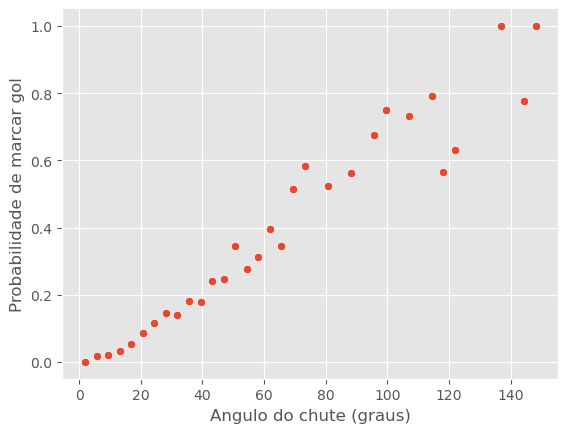

In [38]:
plt.style.use('ggplot')
# numero de chutes por angulo
shotcount_dist = np.histogram(shots['angle']*180/np.pi, bins=40, range=[0, 150])
# numero de gols por angulo
goalcount_dist = np.histogram(goals['angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
# probabilidade de marcar um gol
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2

# plot


fig,ax = plt.subplots()
#ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
sns.scatterplot(x = midangle, y = prob_goal)
ax.set_ylabel('Probabilidade de marcar gol')
ax.set_xlabel("Angulo do chute (graus)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Hipótese 2) 

#### Existe alguma relação entre a distância do chute e gols?

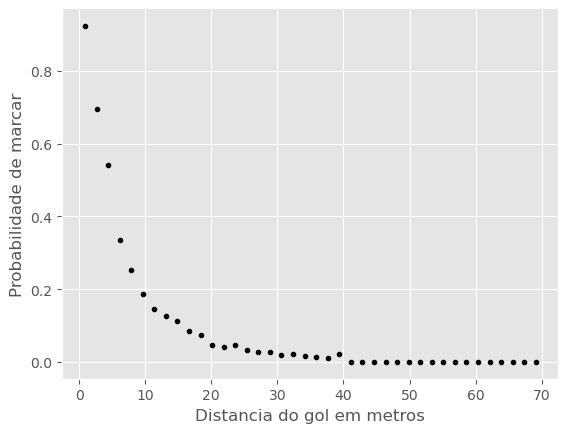

In [39]:
# numero de chutes
shotcount_dist = np.histogram(shots['distance'],bins=40,range=[0, 70])
# numero de gols
goalcount_dist = np.histogram(goals['distance'],bins=40,range=[0, 70])
# probabilidade empirica de marcar
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2

#plot
fig, ax = plt.subplots()

ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')

ax.set_ylabel('Probabilidade de marcar')
ax.set_xlabel("Distancia do gol em metros")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

A seguir iremos fitar um modelos de classificação e o ângulo do chute e a distância são 2 features candidatas para nosso modelo baseline

### Avaliando multicolinearidade

In [40]:
features = ['x', 'y', 'c', 'distance', 'angle',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel']

shots[features].corr()

,x,y,c,distance,angle,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
x,1.000000,-0.013236,0.151850,0.948435,-0.585652,0.229542,-0.024412,-0.071077,-0.280504,0.010427,0.261487,-0.133517,-0.108524
y,-0.013236,1.000000,-0.076380,-0.035570,0.035862,-0.007580,0.000015,0.006143,0.007535,0.011746,0.007378,0.015842,-0.026218
c,0.151850,-0.076380,1.000000,0.434870,-0.569811,0.118247,0.032330,-0.035173,-0.179973,-0.016482,0.056701,0.027982,0.019376
distance,0.948435,-0.035570,0.434870,1.000000,-0.728582,0.249475,-0.011887,-0.074698,-0.314906,0.005065,0.253795,-0.107280,-0.094800
angle,-0.585652,0.035862,-0.569811,-0.728582,1.000000,-0.154591,-0.038091,0.086495,0.287598,0.007340,-0.182624,0.005648,0.024953
free_kick,0.229542,-0.007580,0.118247,0.249475,-0.154591,1.000000,-0.053560,-0.020873,-0.084388,-0.060290,-0.132535,-0.046149,-0.155527
counter_attack,-0.024412,0.000015,0.032330,-0.011887,-0.038091,-0.053560,1.000000,-0.013222,-0.037433,-0.034168,0.031707,0.062936,0.016082
rebound,-0.071077,0.006143,-0.035173,-0.074698,0.086495,-0.020873,-0.013222,1.000000,-0.034412,-0.024585,-0.054045,-0.018819,-0.063421
prev_cross,-0.280504,0.007535,-0.179973,-0.314906,0.287598,-0.084388,-0.037433,-0.034412,1.000000,-0.099395,-0.218502,-0.076083,-0.256407
prev_touch,0.010427,0.011746,-0.016482,0.005065,0.007340,-0.060290,-0.034168,-0.024585,-0.099395,1.000000,-0.156104,-0.054356,-0.183185


<AxesSubplot: >

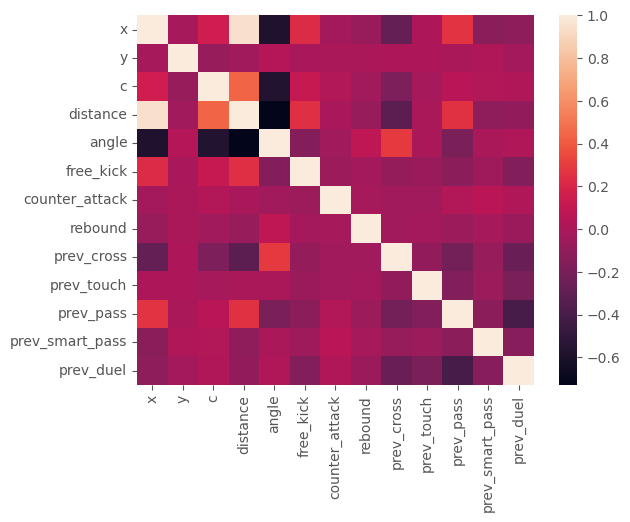

In [41]:
sns.heatmap(shots[features].corr())

Conclusão: nós não iremos considerar as features 'x' e 'distance' juntas no modelo devido à elevada correlação entre elas

## Modelagem

In [42]:
#shots = pd.read_csv('./data/shots_dataframe_modelling.csv') caso queira começar deste ponto

In [43]:
features = ['y', 'c', 'distance', 'angle',
       'free_kick', 'counter_attack', 'rebound', 'prev_cross', 'prev_touch',
       'prev_pass', 'prev_smart_pass', 'prev_duel'] # removemos x da lista de features devido à análise de multicolinearidade feita anteriormente

baseline_features = ['distance', 'angle']

target = ['goal']

In [44]:
X = shots[features]
X_baseline = shots[baseline_features]
y = shots[target]

Separando os dados em treino / teste

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.25, random_state=42)

### Modelo baseline - Regressão Logística

In [46]:
lr_baseline = LogisticRegression(random_state=42)
lr_baseline.fit(X_train, np.array(y_train).ravel())

LogisticRegression(random_state=42)

In [47]:
pred_vals_baseline = lr_baseline.predict(X_test)

In [48]:
for i, col in enumerate(X_train.columns):
    print(f"Coeficiente da feature {col}: {lr_baseline.coef_[0][i]:.3f}")

Coeficiente da feature distance: -0.088
Coeficiente da feature angle: 1.373


In [49]:
pred_probs = lr_baseline.predict_proba(X_test)[:,1]
print(f"Log loss do modelo: {sk_metrics.log_loss(y_test, pred_probs):.5f}")
print(f"AUC do modelo: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%")

Log loss do modelo: 0.28693
AUC do modelo: 76.59%


In [50]:
# A titulo de comparação, caso tenhamos usado apenas a média para fazer a predição, a log-loss seria:

print(f"Log loss da média (0.1017, calculado anteriormente): {sk_metrics.log_loss(y_test, [0.1017]*len(y_test)):.3f}")

Log loss da média (0.1017, calculado anteriormente): 0.333


Nosso baseline é melhor do que usar a média para prever, o que é bom. Vamos agora usar validação cruzada e todas as features

### Regressão Logística - Testando todas as features + CV

In [51]:

X = shots[features]
y = shots[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LogisticRegression(random_state=42)

# Define the cross-validation scheme
cv = KFold(n_splits=5, shuffle=True, random_state=42)

train_losses = []
valid_losses = []

# Loop over the folds
for train_idx, valid_idx in cv.split(X_train, y_train):
    # Split the data into training and validation sets
    X_t, y_t = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_valid, y_valid = X_train.iloc[valid_idx], y_train.iloc[valid_idx]
    
    # Train the logistic regression model on the training set
    lr.fit(X_t, np.array(y_t).ravel())
    
    # Compute the log-loss on the training set
    train_pred = lr.predict_proba(X_t)[:,1]
    train_loss = sk_metrics.log_loss(y_t, train_pred)
    train_losses.append(train_loss)
    
    # Compute the log-loss on the validation set
    valid_pred = lr.predict_proba(X_valid)[:,1]
    valid_loss = sk_metrics.log_loss(y_valid, valid_pred)
    valid_losses.append(valid_loss)

# Compute the average training and validation losses over all folds
avg_train_loss = np.mean(train_losses)
avg_valid_loss = np.mean(valid_losses)

print(f"Média no treino da log-loss: {avg_train_loss:.4f}")
print(f"Média na validação da log-loss: {avg_valid_loss:.4f}")

Média no treino da log-loss: 0.2787
Média na validação da log-loss: 0.2791


Não parece haver overfitting, dado que o resultado de treino e validação são similares. Vamos ver o desempenho no hold-out.

In [52]:
lr.fit(X_train, np.array(y_train).ravel())

LogisticRegression(random_state=42)

In [53]:
pred_vals_allfeatures = lr.predict(X_test)

In [54]:
pred_probs = lr.predict_proba(X_test)[:,1]
print(f"Log loss do modelo: {sk_metrics.log_loss(y_test, pred_probs):.5f}")
print(f"AUC do modelo: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%")

Log loss do modelo: 0.28113
AUC do modelo: 77.85%


In [55]:
for i, col in enumerate(X_train.columns):
    print(f"Coeficiente da feature {col}: {lr.coef_[0][i]:.3f}")

Coeficiente da feature y: -0.005
Coeficiente da feature c: -0.005
Coeficiente da feature distance: -0.112
Coeficiente da feature angle: 1.186
Coeficiente da feature free_kick: 0.921
Coeficiente da feature counter_attack: 0.581
Coeficiente da feature rebound: 0.164
Coeficiente da feature prev_cross: -0.451
Coeficiente da feature prev_touch: -0.008
Coeficiente da feature prev_pass: -0.020
Coeficiente da feature prev_smart_pass: 0.249
Coeficiente da feature prev_duel: -0.486


### Random Forest

In [56]:
# Separando o dataset de treino em treino e validação para cross-validation
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(criterion="log_loss")

param_grid = {
                 'n_estimators': [30,40,60],
                 'max_depth': [4,5,6,7,8,9,10],
                 'min_samples_split': [2,4,6,8]
            }

grid_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs = -1, scoring = 'neg_log_loss')
grid_rf.fit(X_t, np.array(y_t).ravel())

print(f"Training log-loss:{sk_metrics.log_loss(y_t, grid_rf.predict_proba(X_t))}")

print("\n")

print(f"Validation log-loss: {sk_metrics.log_loss(y_val, grid_rf.predict_proba(X_val))}")

print("\n")

print(f"Best parameters were:{grid_rf.best_params_}")

Training log-loss:0.2652748645488553


Validation log-loss: 0.28779839439772237


Best parameters were:{'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 60}


In [58]:
rf = RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=60, criterion="log_loss")
rf.fit(X_train, np.array(y_train).ravel())

RandomForestClassifier(criterion='log_loss', max_depth=7, min_samples_split=4,
                       n_estimators=60)

In [59]:
pred_probs_rf = rf.predict_proba(X_test)[:,1]
print(f"Log loss da Random Forest: {sk_metrics.log_loss(y_test, pred_probs_rf):.5f}")
print(f"AUC da Random Forest: {sk_metrics.roc_auc_score(y_test, pred_probs_rf)*100:.2f}%")

Log loss da Random Forest: 0.28084
AUC da Random Forest: 78.21%


In [60]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    rf, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Tempo para computar as feature importances usando permutação: {elapsed_time:.3f} segundos")

forest_importances = pd.Series(result.importances_mean, index=features)

Tempo para computar as feature importances usando permutação: 1.886 segundos


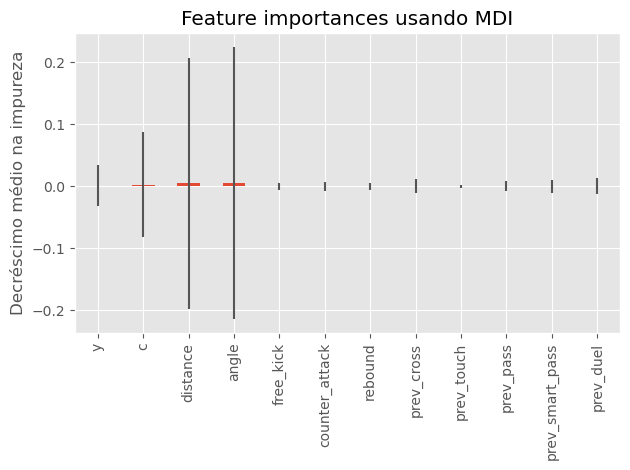

In [61]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances usando MDI")
ax.set_ylabel("Decréscimo médio na impureza")
fig.tight_layout()